In [1557]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Mescyt

In [1398]:
#importamos el archivo y usamos skiprows para eliminar las primeras 6 filas del excel 
df_mescyt=pd.read_excel("C:/Users/djbro/Downloads/EJECUCION-DE-GASTOS-Y-APLICACIONES-FINANCIERAS-DICIEMBRE-2025.xlsx",skiprows=6,skipfooter=22,engine="openpyxl")

In [1399]:
#Eliminamos las columnmas que no nos interesan
df_mescyt.drop(columns=["Unnamed: 16","Unnamed: 17"," Modificado","Total "],inplace=True)

In [1400]:
df_mescyt.columns

Index(['Detalle', 'Aprobado', 'Enero ', 'Febrero ', 'Marzo', 'Abril', 'Mayo',
       'Junio ', 'Julio ', 'Agosto  ', 'Septiembre', 'Octubre', 'Noviembre',
       'Diciembre '],
      dtype='object')

In [1401]:
#aqui renombramos las columnas
df_mescyt=df_mescyt.rename(columns={"Detalle":"Tipo de Gasto","Aprobado":"Presupuesto Aprobado"})

In [1402]:
#aqui comenzamos el proceso de despivotar es decir de poner la tabla en formato tidy
df_mescyt=df_mescyt.melt(id_vars=["Tipo de Gasto","Presupuesto Aprobado"],var_name="Mes",value_name="Gasto")

In [1403]:
df_mescyt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1248 entries, 0 to 1247
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Tipo de Gasto         900 non-null    object 
 1   Presupuesto Aprobado  576 non-null    float64
 2   Mes                   1248 non-null   object 
 3   Gasto                 381 non-null    float64
dtypes: float64(2), object(2)
memory usage: 39.1+ KB


In [1404]:
df_mescyt

,Tipo de Gasto,Presupuesto Aprobado,Mes,Gasto
0,2 - GASTOS,2.051928e+10,Enero,1.320524e+09
1,2.1 - REMUNERACIONES Y CONTRIBUCIONES,1.001824e+09,Enero,6.243810e+07
2,2.1.1 - REMUNERACIONES,7.507007e+08,Enero,5.300584e+07
3,2.1.2 - SOBRESUELDOS,1.559614e+08,Enero,1.508840e+06
4,2.1.3 - DIETAS Y GASTOS DE REPRESENTACIÓN,NaN,Enero,NaN
...,...,...,...,...
1243,NaN,NaN,Diciembre,NaN
1244,NaN,NaN,Diciembre,NaN
1245,4.2.2 - DISMINUCIÓN DE PASIVOS NO CORRIENTES,0.000000e+00,Diciembre,NaN
1246,4.3 - DISMINUCIÓN DE FONDOS DE TERCEROS,0.000000e+00,Diciembre,NaN


In [1405]:
df_mescyt["Gasto"]=df_mescyt["Gasto"].fillna(0)

In [1406]:
df_mescyt["Presupuesto Aprobado"]=df_mescyt["Presupuesto Aprobado"].fillna(0)

In [1407]:
df_mescyt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1248 entries, 0 to 1247
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Tipo de Gasto         900 non-null    object 
 1   Presupuesto Aprobado  1248 non-null   float64
 2   Mes                   1248 non-null   object 
 3   Gasto                 1248 non-null   float64
dtypes: float64(2), object(2)
memory usage: 39.1+ KB


In [1408]:
#Reiniciamos el indice
df_mescyt.reset_index(drop=True,inplace=True)

In [1409]:
#Aqui limpiamos la columna de Tipo de Gasto para eliminar los numeros, guiones y espaciones, usamos el metodo upper para poner todo en mayusculas.

df_mescyt = df_mescyt.copy()

mask = df_mescyt["Tipo de Gasto"].notna()

df_mescyt.loc[mask, "Tipo de Gasto"] = (
    df_mescyt.loc[mask, "Tipo de Gasto"]
    .astype(str)
    .str.replace(r"^\d+(\.\d+)*\s*-\s*", "", regex=True)
    .str.strip()
    .str.upper()
)


In [1410]:
df_mescyt=df_mescyt[~df_mescyt["Tipo de Gasto"].isin(["GASTOS","REMUNERACIONES Y CONTRIBUCIONES",
"CONTRATACIÓN DE SERVICIOS","MATERIALES Y SUMINISTROS","TRANSFERENCIAS CORRIENTES","TRANSFERENCIAS DE CAPITAL","BIENES MUEBLES, INMUEBLES E INTANGIBLES",
"OBRAS","TOTAL GASTOS","TOTAL GASTOS Y APLICACIONES FINANCIERAS","APLICACIONES FINANCIERAS","INCREMENTO DE ACTIVOS FINANCIEROS","DISMINUCIÓN DE PASIVOS",
"DISMINUCIÓN DE FONDOS DE TERCEROS","GASTOS FINANCIEROS","ADQUISICION DE ACTIVOS FINANCIEROS CON FINES DE POLÍTICA"                                                    ])]

In [1411]:
df_mescyt

,Tipo de Gasto,Presupuesto Aprobado,Mes,Gasto
2,REMUNERACIONES,750700700.0,Enero,53005841.59
3,SOBRESUELDOS,155961362.0,Enero,1508840.00
4,DIETAS Y GASTOS DE REPRESENTACIÓN,0.0,Enero,0.00
5,GRATIFICACIONES Y BONIFICACIONES,0.0,Enero,0.00
6,CONTRIBUCIONES A LA SEGURIDAD SOCIAL,95161960.0,Enero,7923419.02
...,...,...,...,...
1242,NaN,0.0,Diciembre,0.00
1243,NaN,0.0,Diciembre,0.00
1244,NaN,0.0,Diciembre,0.00
1245,DISMINUCIÓN DE PASIVOS NO CORRIENTES,0.0,Diciembre,0.00


In [1412]:
df_mescyt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1068 entries, 2 to 1247
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Tipo de Gasto         720 non-null    object 
 1   Presupuesto Aprobado  1068 non-null   float64
 2   Mes                   1068 non-null   object 
 3   Gasto                 1068 non-null   float64
dtypes: float64(2), object(2)
memory usage: 41.7+ KB


In [1413]:
df_mescyt=df_mescyt[~df_mescyt["Tipo de Gasto"].isna()]

In [1414]:
#Reiniciamos el indice
df_mescyt.reset_index(drop=True,inplace=True)

In [1415]:
df_mescyt["Institucion"]="MESCYT"

C:\Users\djbro\AppData\Local\Temp\ipykernel_13712\2243318287.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mescyt["Institucion"]="MESCYT"


In [1416]:
#Vamos a hacer una estimacion de la columna presupuesto aprobado y vamos a dividirlo por 12 para tener un monto mensual.
df_mescyt=df_mescyt.copy()
df_mescyt["Presupuesto Aprobado"]=(df_mescyt["Presupuesto Aprobado"]/12).round(2)

In [1417]:
df_mescyt["Gasto"].sum()

np.float64(21306659157.440002)

In [1565]:
df_mescyt

,Tipo de Gasto,Presupuesto Aprobado,Mes,Gasto,Institucion
0,REMUNERACIONES,62558391.67,Enero,53005841.59,MESCYT
1,SOBRESUELDOS,12996780.17,Enero,1508840.00,MESCYT
2,DIETAS Y GASTOS DE REPRESENTACIÓN,0.00,Enero,0.00,MESCYT
3,GRATIFICACIONES Y BONIFICACIONES,0.00,Enero,0.00,MESCYT
4,CONTRIBUCIONES A LA SEGURIDAD SOCIAL,7930163.33,Enero,7923419.02,MESCYT
...,...,...,...,...,...
715,INCREMENTO DE ACTIVOS FINANCIEROS CORRIENTES,0.00,Diciembre,0.00,MESCYT
716,INCREMENTO DE ACTIVOS FINANCIEROS NO CORRIENTES,0.00,Diciembre,0.00,MESCYT
717,DISMINUCIÓN DE PASIVOS CORRIENTES,0.00,Diciembre,0.00,MESCYT
718,DISMINUCIÓN DE PASIVOS NO CORRIENTES,0.00,Diciembre,0.00,MESCYT


# MICM

In [1419]:
df_micm=pd.read_excel("C:/Users/djbro/Downloads/Ejecucion_mensual_del_Presupuesto_Diciembre_2025.xlsx",skiprows=15,skipfooter=18,engine="openpyxl")

C:\Users\djbro\anaconda3\Lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [1420]:
df_micm.drop(columns=["Unnamed: 0","Presupesto Aprobado","TOTAL"],inplace=True)

In [1421]:
df_micm.rename(columns={"Detalle":"Tipo de Gasto","Prespuesto Modificado":"Presupuesto Aprobado"},inplace=True)

In [1422]:
df_micm.columns

Index(['Tipo de Gasto', 'Presupuesto Aprobado', 'Enero', 'Febrero', 'Marzo',
       'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre',
       'Noviembre', 'Diciembre '],
      dtype='object')

In [1423]:
df_micm=df_micm.melt(id_vars=["Tipo de Gasto","Presupuesto Aprobado"],var_name="Mes",value_name="Gasto")

df_micm

,Tipo de Gasto,Presupuesto Aprobado,Mes,Gasto
0,2-GASTOS,NaN,Enero,NaN
1,2.1-REMUNERACIONES Y CONTRIBUCIONES,2.543472e+09,Enero,1.488467e+08
2,2.1.1-REMUNERACIONES,1.697310e+09,Enero,1.237802e+08
3,2.1.2-SOBRESUELDOS,6.009099e+08,Enero,7.783075e+06
4,2.1.3-DIETAS Y GASTOS DE REPRESENTACIÓN,2.230000e+06,Enero,1.323975e+05
...,...,...,...,...
979,4.2-DISMINUCION DE PASIVOS,0.000000e+00,Diciembre,0.000000e+00
980,4.2.1-DISMINUCIÓN DE PASIVOS CORRIENTES,NaN,Diciembre,0.000000e+00
981,4.2.2-DISMINUCIÓN DE PASIVOS NO CORRIENTES,NaN,Diciembre,0.000000e+00
982,4.3-DISMINUCION DE FONDOS DE TERCEROS,NaN,Diciembre,0.000000e+00


In [1424]:
df_micm.columns

Index(['Tipo de Gasto', 'Presupuesto Aprobado', 'Mes', 'Gasto'], dtype='object')

In [1425]:
df_micm["Gasto"]=df_micm["Gasto"].fillna(0)

df_micm["Presupuesto Aprobado"]=df_micm["Presupuesto Aprobado"].fillna(0)

In [1426]:
df_micm = df_micm.copy()

mask = df_micm["Tipo de Gasto"].notna()

df_micm.loc[mask, "Tipo de Gasto"] = (
    df_micm.loc[mask, "Tipo de Gasto"]
    .astype(str)
    .str.replace(r"^\d+(\.\d+)*\s*-\s*", "", regex=True)
    .str.strip()
    .str.upper()
)


In [1427]:
df_micm=df_micm[~df_micm["Tipo de Gasto"].isin(["GASTOS","REMUNERACIONES Y CONTRIBUCIONES",
"CONTRATACIÓN DE SERVICIOS","MATERIALES Y SUMINISTROS","TRANSFERENCIAS CORRIENTES","TRANSFERENCIAS DE CAPITAL","BIENES MUEBLES, INMUEBLES E INTANGIBLES",
"OBRAS","TOTAL GASTOS","TOTAL GASTOS Y APLICACIONES FINANCIERAS","APLICACIONES FINANCIERAS","INCREMENTO DE ACTIVOS FINANCIEROS","DISMINUCIÓN DE PASIVOS",
"DISMINUCIÓN DE FONDOS DE TERCEROS","GASTOS FINANCIEROS","ADQUISICION DE ACTIVOS FINANCIEROS CON FINES DE POLÍTICA"])]

In [1428]:
df_micm=df_micm[~df_micm["Tipo de Gasto"].isna()]

In [1429]:
#Reiniciamos el indice
df_micm.reset_index(drop=True,inplace=True)

In [1430]:
df_micm["Institucion"]="MICM"

In [1431]:
df_micm=df_micm.copy()
df_micm["Presupuesto Aprobado"]=(df_micm["Presupuesto Aprobado"]/12).round(2)

In [1432]:
df_micm["Presupuesto Aprobado"].sum()

np.float64(23988463505.760002)

In [1433]:
df_micm

,Tipo de Gasto,Presupuesto Aprobado,Mes,Gasto,Institucion
0,REMUNERACIONES,1.414425e+08,Enero,1.237802e+08,MICM
1,SOBRESUELDOS,5.007582e+07,Enero,7.783075e+06,MICM
2,DIETAS Y GASTOS DE REPRESENTACIÓN,1.858333e+05,Enero,1.323975e+05,MICM
3,GRATIFICACIONES Y BONIFICACIONES,2.142259e+06,Enero,0.000000e+00,MICM
4,CONTRIBUCIONES A LA SEGURIDAD SOCIAL,1.810958e+07,Enero,1.715101e+07,MICM
...,...,...,...,...,...
799,INCREMENTO DE ACTIVOS FINANCIEROS NO CORRIENTES,0.000000e+00,Diciembre,0.000000e+00,MICM
800,DISMINUCION DE PASIVOS,0.000000e+00,Diciembre,0.000000e+00,MICM
801,DISMINUCIÓN DE PASIVOS CORRIENTES,0.000000e+00,Diciembre,0.000000e+00,MICM
802,DISMINUCIÓN DE PASIVOS NO CORRIENTES,0.000000e+00,Diciembre,0.000000e+00,MICM


 # MEPYD

In [1434]:
df_me=pd.read_excel("C:/Users/djbro/Downloads/Plantilla-de-ejecucion-presupuestaria-diciembre-2025.-OAI.xlsx",skiprows=8,skipfooter=489,engine="openpyxl")

C:\Users\djbro\anaconda3\Lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [1435]:
df_me.drop(columns=["Presupuesto aprobado","TOTAL"],inplace=True)

In [1436]:
df_me=df_me.rename(columns={"Detalle": "Tipo de Gasto","Presupuesto modificado":"Presupuesto Aprobado"})

In [1437]:
#Elimino esta fila, que no necesito, por que contiene nuevamente el nombre de las columnas.
df_me=df_me.drop(index=43)

In [1438]:
df_me=df_me.melt(id_vars=["Tipo de Gasto","Presupuesto Aprobado"],var_name="Mes",value_name="Gasto")

In [1439]:
df_me

,Tipo de Gasto,Presupuesto Aprobado,Mes,Gasto
0,2 - GASTOS,3065593266.66,ENERO,101490768.26
1,2.1 - REMUNERACIONES Y CONTRIBUCIONES,1292365831.01,ENERO,81386945.23
2,2.1.1 - REMUNERACIONES,923461214.03,ENERO,69231872.55
3,2.1.2 - SOBRESUELDOS,241214617,ENERO,1816806
4,2.1.3 - DIETAS Y GASTOS DE REPRESENTACIÓN,540000,ENERO,0
...,...,...,...,...
907,4.2 - DISMINUCIÓN DE PASIVOS,0,DICIEMBRE,0
908,4.2.1 - DISMINUCIÓN DE PASIVOS CORRIENTES,0,DICIEMBRE,0
909,4.2.2 - DISMINUCIÓN DE PASIVOS NO CORRIENTES,0,DICIEMBRE,0
910,4.3 - DISMINUCIÓN DE FONDOS DE TERCEROS,0,DICIEMBRE,0


In [1440]:
df_me["Gasto"]=df_me["Gasto"].fillna(0)

df_me["Presupuesto Aprobado"]=df_me["Presupuesto Aprobado"].fillna(0)

C:\Users\djbro\AppData\Local\Temp\ipykernel_13712\208505482.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_me["Gasto"]=df_me["Gasto"].fillna(0)
C:\Users\djbro\AppData\Local\Temp\ipykernel_13712\208505482.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_me["Presupuesto Aprobado"]=df_me["Presupuesto Aprobado"].fillna(0)


In [1441]:
df_me = df_me.copy()

mask = df_me["Tipo de Gasto"].notna()

df_me.loc[mask, "Tipo de Gasto"] = (
    df_me.loc[mask, "Tipo de Gasto"]
    .astype(str)
    .str.replace(r"^\d+(\.\d+)*\s*-\s*", "", regex=True)
    .str.strip()
    .str.upper()
)


In [1442]:
df_me=df_me[~df_me["Tipo de Gasto"].isna()]

In [1443]:
df_me.info()

<class 'pandas.core.frame.DataFrame'>
Index: 900 entries, 0 to 911
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Tipo de Gasto         900 non-null    object 
 1   Presupuesto Aprobado  900 non-null    float64
 2   Mes                   900 non-null    object 
 3   Gasto                 900 non-null    float64
dtypes: float64(2), object(2)
memory usage: 35.2+ KB


In [1444]:
df_me=df_me[~df_me["Tipo de Gasto"].isin(["GASTOS","REMUNERACIONES Y CONTRIBUCIONES",
"CONTRATACIÓN DE SERVICIOS","MATERIALES Y SUMINISTROS","TRANSFERENCIAS CORRIENTES","TRANSFERENCIAS DE CAPITAL","BIENES MUEBLES, INMUEBLES E INTANGIBLES",
"OBRAS","TOTAL GASTOS","TOTAL GASTOS Y APLICACIONES FINANCIERAS","APLICACIONES FINANCIERAS","INCREMENTO DE ACTIVOS FINANCIEROS","DISMINUCIÓN DE PASIVOS",
"DISMINUCIÓN DE FONDOS DE TERCEROS","GASTOS FINANCIEROS","ADQUISICION DE ACTIVOS FINANCIEROS CON FINES DE POLÍTICA"])]

In [1445]:
#Reiniciamos el indice
df_me.reset_index(drop=True,inplace=True)

In [1446]:
df_me["Institucion"]="MEPYD"

In [1447]:
df_me.head(50)

,Tipo de Gasto,Presupuesto Aprobado,Mes,Gasto,Institucion
0,REMUNERACIONES,9.234612e+08,ENERO,69231872.55,MEPYD
1,SOBRESUELDOS,2.412146e+08,ENERO,1816806.00,MEPYD
2,DIETAS Y GASTOS DE REPRESENTACIÓN,5.400000e+05,ENERO,0.00,MEPYD
3,GRATIFICACIONES Y BONIFICACIONES,0.000000e+00,ENERO,0.00,MEPYD
4,CONTRIBUCIONES A LA SEGURIDAD SOCIAL,1.271500e+08,ENERO,10338266.68,MEPYD
5,SERVICIOS BÁSICOS,3.797000e+07,ENERO,3032107.42,MEPYD
6,"PUBLICIDAD, IMPRESIÓN Y ENCUADERNACIÓN",2.362398e+07,ENERO,556785.36,MEPYD
7,VIÁTICOS,2.450000e+07,ENERO,0.00,MEPYD
8,TRANSPORTE Y ALMACENAJE,7.910000e+06,ENERO,0.00,MEPYD
9,ALQUILERES Y RENTAS,5.780821e+07,ENERO,422895.32,MEPYD


In [1448]:
df_me=df_me.copy()
df_me["Presupuesto Aprobado"]=(df_me["Presupuesto Aprobado"]/12).round(2)

In [1566]:
df_me["Gasto"].sum()

np.float64(2553859746.49)

In [1567]:
df_me

,Tipo de Gasto,Presupuesto Aprobado,Mes,Gasto,Institucion
0,REMUNERACIONES,76955101.17,ENERO,69231872.55,MEPYD
1,SOBRESUELDOS,20101218.08,ENERO,1816806.00,MEPYD
2,DIETAS Y GASTOS DE REPRESENTACIÓN,45000.00,ENERO,0.00,MEPYD
3,GRATIFICACIONES Y BONIFICACIONES,0.00,ENERO,0.00,MEPYD
4,CONTRIBUCIONES A LA SEGURIDAD SOCIAL,10595833.33,ENERO,10338266.68,MEPYD
...,...,...,...,...,...
715,INCREMENTO DE ACTIVOS FINANCIEROS CORRIENTES,0.00,DICIEMBRE,0.00,MEPYD
716,INCREMENTO DE ACTIVOS FINANCIEROS NO CORRIENTES,0.00,DICIEMBRE,0.00,MEPYD
717,DISMINUCIÓN DE PASIVOS CORRIENTES,0.00,DICIEMBRE,0.00,MEPYD
718,DISMINUCIÓN DE PASIVOS NO CORRIENTES,0.00,DICIEMBRE,0.00,MEPYD


# Ministerio de la Mujer


In [1450]:
import pandas as pd


# 1. Carga de datos
df_Ministerio_Mujer = pd.read_excel(
    r"C:\Users\djbro\Downloads\EJECUCION PRESUPUESTARIA DICIEMBRE MINISTERIO DE LA MUJER 2025.xlsx", 
    skiprows=10, 
    skipfooter=12, 
    engine="openpyxl"
)

# ESTA ES LA PARTE CLAVE PARA EVITAR EL KEYERROR 
# Limpiamos todos los nombres de columnas eliminando espacios al inicio/final y asegurando mayúsculas
df_Ministerio_Mujer.columns = df_Ministerio_Mujer.columns.astype(str).str.strip().str.upper()

# 2. Renombrado (Usando los nombres exactos que acabamos de normalizar)
df_Ministerio_Mujer = df_Ministerio_Mujer.rename(columns={
    "DETALLE": "Tipo de Gasto", 
    "PRESUPUESTO APROBADO": "Presupuesto Aprobado"
})

# 3. Eliminación de columnas sobrantes (Igual que Mescyt)
cols_a_eliminar = ['UNNAMED: 0', 'PRESUPUESTO MODIFICADO', 'TOTAL', 'UNNAMED: 16', 'UNNAMED: 17']
df_Ministerio_Mujer.drop(columns=[c for c in cols_a_eliminar if c in df_Ministerio_Mujer.columns], inplace=True)

# 4. Transformación de Ancho a Largo (Melt) - ESTRUCTURA MESCYT
df_Ministerio_Mujer = df_Ministerio_Mujer.melt(
    id_vars=["Tipo de Gasto", "Presupuesto Aprobado"], 
    var_name="Mes", 
    value_name="Gasto"
)

# 5. Limpieza de texto con Regex (Igual que Mescyt)
df_Ministerio_Mujer["Tipo de Gasto"] = (
    df_Ministerio_Mujer["Tipo de Gasto"]
    .astype(str)
    .str.replace(r"^\d+(\.\d+)*\s*-\s*", "", regex=True)
    .str.strip()
    .str.upper()
)


# 7. Estandarización final
df_Ministerio_Mujer["Institucion"] = "Ministerio de la Mujer"
df_Ministerio_Mujer["Gasto"] = pd.to_numeric(df_Ministerio_Mujer["Gasto"], errors='coerce').fillna(0)
df_Ministerio_Mujer["Mes"] = df_Ministerio_Mujer["Mes"].str.strip().str.capitalize()

df_Ministerio_Mujer.reset_index(drop=True, inplace=True)

# Resultado final
df_Ministerio_Mujer["Presupuesto Aprobado"]=(df_Ministerio_Mujer["Presupuesto Aprobado"]/12).round(2)

In [1451]:
df_Ministerio_Mujer["Presupuesto Aprobado"].sum()

np.float64(3762924464.76)

In [1549]:
df_Ministerio_Mujer

,Tipo de Gasto,Presupuesto Aprobado,Mes,Gasto,Institucion
0,GASTOS,NaN,Enero,0.00,Ministerio de la Mujer
1,REMUNERACIONES Y CONTRIBUCIONES,38744988.42,Enero,29014851.48,Ministerio de la Mujer
2,REMUNERACIONES,28067599.58,Enero,24834828.62,Ministerio de la Mujer
3,SOBRESUELDOS,4823369.50,Enero,450000.00,Ministerio de la Mujer
4,DIETAS Y GASTOS DE REPRESENTACIÓN,0.00,Enero,0.00,Ministerio de la Mujer
...,...,...,...,...,...
883,INCREMENTO DE ACTIVOS FINANCIEROS NO CORRIENTES,0.00,Diciembre,0.00,Ministerio de la Mujer
884,DISMINUCIÓN DE PASIVOS,0.00,Diciembre,0.00,Ministerio de la Mujer
885,DISMINUCIÓN DE PASIVOS CORRIENTES,0.00,Diciembre,0.00,Ministerio de la Mujer
886,DISMINUCIÓN DE PASIVOS NO CORRIENTES,0.00,Diciembre,0.00,Ministerio de la Mujer


# Ministerio de interior y policia 

In [1453]:
df_mip=pd.read_excel("C:/Users/djbro\Downloads/Interior y policia.xlsx",skiprows=14,skipfooter=16, engine="openpyxl")

In [1454]:
df_mip=df_mip.drop(index=[0,1])

In [1455]:
df_mip=df_mip.rename(columns={"Unnamed: 0":"Tipo de Gasto","Unnamed: 2":"Presupuesto Aprobado"})

In [1456]:
df_mip.drop(columns=["Unnamed: 1","Total "],inplace=True)

In [1457]:
df_mip=df_mip.melt(id_vars=["Tipo de Gasto","Presupuesto Aprobado"],var_name="Mes",value_name="Gasto")

In [1458]:
df_mip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Tipo de Gasto         864 non-null    object 
 1   Presupuesto Aprobado  768 non-null    float64
 2   Mes                   864 non-null    object 
 3   Gasto                 562 non-null    float64
dtypes: float64(2), object(2)
memory usage: 27.1+ KB


In [1459]:
df_mip["Gasto"]=df_mip["Gasto"].fillna(0)

df_mip["Presupuesto Aprobado"]=df_mip["Presupuesto Aprobado"].fillna(0)

In [1460]:
df_mip = df_mip.copy()

mask = df_mip["Tipo de Gasto"].notna()

df_mip.loc[mask, "Tipo de Gasto"] = (
    df_mip.loc[mask, "Tipo de Gasto"]
    .astype(str)
    .str.replace(r"^\d+(\.\d+)*\s*-\s*", "", regex=True)
    .str.strip()
    .str.upper()
)


In [1461]:
df_mip=df_mip[~df_mip["Tipo de Gasto"].isin(["GASTOS","REMUNERACIONES Y CONTRIBUCIONES",
"CONTRATACIÓN DE SERVICIOS","MATERIALES Y SUMINISTROS","TRANSFERENCIAS CORRIENTES","TRANSFERENCIAS DE CAPITAL","BIENES MUEBLES, INMUEBLES E INTANGIBLES",
"OBRAS","TOTAL GASTOS","TOTAL GASTOS Y APLICACIONES FINANCIERAS","APLICACIONES FINANCIERAS","INCREMENTO DE ACTIVOS FINANCIEROS","DISMINUCIÓN DE PASIVOS",
"DISMINUCIÓN DE FONDOS DE TERCEROS","GASTOS FINANCIEROS","ADQUISICION DE ACTIVOS FINANCIEROS CON FINES DE POLÍTICA"])]

In [1462]:
df_mip=df_mip[~df_mip["Tipo de Gasto"].isna()]

In [1463]:
df_mip.reset_index(drop=True, inplace=True)

In [1464]:
df_mip

,Tipo de Gasto,Presupuesto Aprobado,Mes,Gasto
0,REMUNERACIONES,1.904770e+09,Enero,1.095232e+08
1,SOBRESUELDOS,5.054109e+08,Enero,8.596278e+06
2,DIETAS Y GASTOS DE REPRESENTACIÓN,9.090700e+04,Enero,0.000000e+00
3,GRATIFICACIONES Y BONIFICACIONES,5.947313e+07,Enero,0.000000e+00
4,CONTRIBUCIONES A LA SEGURIDAD SOCIAL,2.532973e+08,Enero,1.668243e+07
...,...,...,...,...
715,INCREMENTO DE ACTIVOS FINANCIEROS CORRIENTES,0.000000e+00,Diciembre,0.000000e+00
716,INCREMENTO DE ACTIVOS FINANCIEROS NO CORRIENTES,0.000000e+00,Diciembre,0.000000e+00
717,DISMINUCIÓN DE PASIVOS CORRIENTES,0.000000e+00,Diciembre,0.000000e+00
718,DISMINUCIÓN DE PASIVOS NO CORRIENTES,0.000000e+00,Diciembre,0.000000e+00


In [1465]:
df_mip["Institucion"]="MIP"

In [1466]:
df_mip

,Tipo de Gasto,Presupuesto Aprobado,Mes,Gasto,Institucion
0,REMUNERACIONES,1.904770e+09,Enero,1.095232e+08,MIP
1,SOBRESUELDOS,5.054109e+08,Enero,8.596278e+06,MIP
2,DIETAS Y GASTOS DE REPRESENTACIÓN,9.090700e+04,Enero,0.000000e+00,MIP
3,GRATIFICACIONES Y BONIFICACIONES,5.947313e+07,Enero,0.000000e+00,MIP
4,CONTRIBUCIONES A LA SEGURIDAD SOCIAL,2.532973e+08,Enero,1.668243e+07,MIP
...,...,...,...,...,...
715,INCREMENTO DE ACTIVOS FINANCIEROS CORRIENTES,0.000000e+00,Diciembre,0.000000e+00,MIP
716,INCREMENTO DE ACTIVOS FINANCIEROS NO CORRIENTES,0.000000e+00,Diciembre,0.000000e+00,MIP
717,DISMINUCIÓN DE PASIVOS CORRIENTES,0.000000e+00,Diciembre,0.000000e+00,MIP
718,DISMINUCIÓN DE PASIVOS NO CORRIENTES,0.000000e+00,Diciembre,0.000000e+00,MIP


In [1467]:
df_mip=df_mip.copy()
df_mip["Presupuesto Aprobado"]=(df_mip["Presupuesto Aprobado"]/12).round(2)

In [1468]:
df_mip["Presupuesto Aprobado"].sum()

np.float64(39397670599.44)

# Ministerio de Agricultura.

In [1469]:
df_ma=pd.read_excel("C:/Users/djbro/Downloads/Ejecucion-Enero-a-Diciembre-2025.xlsx",skiprows=11,skipfooter=8,sheet_name=
                    "P2Presup.aprobado Ejec. DIC. 25")

In [1470]:
mapa_errores = {
    "Enero ": "Enero",     
    "Octurbre": "Octubre",  
    "Total ": "Total"}
df_ma = df_ma.rename(columns=mapa_errores)

In [1471]:
df_ma=df_ma.rename(columns={"Unnamed: 0":"Tipo de Gasto","Unnamed: 1":"Presupuesto Aprobado"})

In [1472]:
df_ma.drop(columns=["Unnamed: 2","Total"],inplace=True)

In [1473]:
df_ma=df_ma.melt(id_vars=["Tipo de Gasto","Presupuesto Aprobado"],var_name="Mes",value_name="Gasto")

In [1474]:
df_ma

,Tipo de Gasto,Presupuesto Aprobado,Mes,Gasto
0,2 - GASTOS,NaN,Enero,NaN
1,2.1 - REMUNERACIONES Y CONTRIBUCIONES,4.572019e+09,Enero,2.972031e+08
2,2.1.1 - REMUNERACIONES,3.505373e+09,Enero,2.587963e+08
3,2.1.2 - SOBRESUELDOS,5.468674e+08,Enero,2.126700e+06
4,2.1.4-GRATIFICACIONES Y BONIFICACIONES,7.500000e+07,Enero,0.000000e+00
...,...,...,...,...
835,4.2 - DISMINUCIÓN DE PASIVOS,0.000000e+00,Diciembre,0.000000e+00
836,4.2.1 - DISMINUCIÓN DE PASIVOS CORRIENTES,NaN,Diciembre,NaN
837,4.2.2 - DISMINUCIÓN DE PASIVOS NO CORRIENTES,NaN,Diciembre,NaN
838,4.3 - DISMINUCIÓN DE FONDOS DE TERCEROS,NaN,Diciembre,NaN


In [1475]:
df_ma["Gasto"]=df_ma["Gasto"].fillna(0)

df_ma["Presupuesto Aprobado"]=df_ma["Presupuesto Aprobado"].fillna(0)

In [1476]:
df_ma = df_ma.copy()

mask = df_ma["Tipo de Gasto"].notna()

df_ma.loc[mask, "Tipo de Gasto"] = (
    df_ma.loc[mask, "Tipo de Gasto"]
    .astype(str)
    .str.replace(r"^\d+(\.\d+)*\s*-\s*", "", regex=True)
    .str.strip()
    .str.upper()
)


In [1477]:
df_ma["Institucion"]="Ministerio de Agricultura"

In [1478]:
df_ma=df_ma[~df_ma["Tipo de Gasto"].isin(["GASTOS","REMUNERACIONES Y CONTRIBUCIONES",
"CONTRATACIÓN DE SERVICIOS","MATERIALES Y SUMINISTROS","TRANSFERENCIAS CORRIENTES","TRANSFERENCIAS DE CAPITAL","BIENES MUEBLES, INMUEBLES E INTANGIBLES",
"OBRAS","TOTAL GASTOS","TOTAL GASTOS Y APLICACIONES FINANCIERAS","APLICACIONES FINANCIERAS","INCREMENTO DE ACTIVOS FINANCIEROS","DISMINUCIÓN DE PASIVOS",
"DISMINUCIÓN DE FONDOS DE TERCEROS","GASTOS FINANCIEROS","ADQUISICION DE ACTIVOS FINANCIEROS CON FINES DE POLÍTICA"])]

,Tipo de Gasto,Presupuesto Aprobado,Mes,Gasto,Institucion
2,REMUNERACIONES,3.505373e+09,Enero,2.587963e+08,Ministerio de Agricultura
3,SOBRESUELDOS,5.468674e+08,Enero,2.126700e+06,Ministerio de Agricultura
4,GRATIFICACIONES Y BONIFICACIONES,7.500000e+07,Enero,0.000000e+00,Ministerio de Agricultura
5,CONTRIBUCIONES A LA SEGURIDAD SOCIAL,4.447789e+08,Enero,3.628013e+07,Ministerio de Agricultura
7,SERVICIOS BÁSICOS,2.954075e+08,Enero,2.782380e+07,Ministerio de Agricultura
...,...,...,...,...,...
833,INCREMENTO DE ACTIVOS FINANCIEROS CORRIENTES,0.000000e+00,Diciembre,0.000000e+00,Ministerio de Agricultura
834,INCREMENTO DE ACTIVOS FINANCIEROS NO CORRIENTES,0.000000e+00,Diciembre,-2.000000e+09,Ministerio de Agricultura
836,DISMINUCIÓN DE PASIVOS CORRIENTES,0.000000e+00,Diciembre,0.000000e+00,Ministerio de Agricultura
837,DISMINUCIÓN DE PASIVOS NO CORRIENTES,0.000000e+00,Diciembre,0.000000e+00,Ministerio de Agricultura


In [1480]:
df_ma=df_ma[~df_ma["Tipo de Gasto"].isna()]

In [1481]:
df_ma.reset_index(drop=True, inplace=True)

In [1482]:
df_ma=df_ma.copy()
df_ma["Presupuesto Aprobado"]=(df_ma["Presupuesto Aprobado"]/12).round(2)

In [1483]:
df_ma["Gasto"].sum()

np.float64(19740383284.059998)

In [1568]:
#El data set original tiene datos negativos, puede ser debido a algun error desde la fuente.
df_ma

,Tipo de Gasto,Presupuesto Aprobado,Mes,Gasto,Institucion
0,REMUNERACIONES,2.921144e+08,Enero,2.587963e+08,Ministerio de Agricultura
1,SOBRESUELDOS,4.557228e+07,Enero,2.126700e+06,Ministerio de Agricultura
2,GRATIFICACIONES Y BONIFICACIONES,6.250000e+06,Enero,0.000000e+00,Ministerio de Agricultura
3,CONTRIBUCIONES A LA SEGURIDAD SOCIAL,3.706491e+07,Enero,3.628013e+07,Ministerio de Agricultura
4,SERVICIOS BÁSICOS,2.461729e+07,Enero,2.782380e+07,Ministerio de Agricultura
...,...,...,...,...,...
667,INCREMENTO DE ACTIVOS FINANCIEROS CORRIENTES,0.000000e+00,Diciembre,0.000000e+00,Ministerio de Agricultura
668,INCREMENTO DE ACTIVOS FINANCIEROS NO CORRIENTES,0.000000e+00,Diciembre,-2.000000e+09,Ministerio de Agricultura
669,DISMINUCIÓN DE PASIVOS CORRIENTES,0.000000e+00,Diciembre,0.000000e+00,Ministerio de Agricultura
670,DISMINUCIÓN DE PASIVOS NO CORRIENTES,0.000000e+00,Diciembre,0.000000e+00,Ministerio de Agricultura


# MAP

In [1484]:
# 1. Carga de datos (MAP)
df_map = pd.read_excel(
    r"C:/Users/djbro/Downloads/EJECUCION-PRESUPUESTARIA-MAP-DICIEMBRE-2025.xlsx", 
    skiprows=6, # Empezamos justo donde dice 'Detalle'
    engine="openpyxl"
)

# REPARACIÓN DE COLUMNAS: Llenamos los nombres vacíos con la fila de los meses (fila 0)
df_map.columns = [
    df_map.iloc[0, i] if "Unnamed" in str(col) else col 
    for i, col in enumerate(df_map.columns)
]

# Eliminamos la fila de apoyo y filas que estén totalmente vacías
df_map = df_map.drop(index=0).dropna(how='all').reset_index(drop=True)
df_map.columns = df_map.columns.astype(str).str.strip()

# VISUALIZACIÓN 1: Verás que ya tenemos los nombres de los meses correctamente
df_map.head()

,Detalle,Presupuesto Aprobado,Presupuesto Modificado,Gasto Devengado,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total,nan,nan
0,2 - GASTOS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.1 - REMUNERACIONES Y CONTRIBUCIONES,611306794.0,0.0,42133244.19,41491163.95,40696583.23,69468600.7,68327687.62,45578403.0,41839114.88,41491901.2,40685843.86,74246415.09,74635778.26,75570053.66,656164789.64,NaN,Fuente: [Reporte del SIGEF]
2,2.1.1 - REMUNERACIONES,451149608.0,0.0,34480350,33756694.26,33185350,33425510.64,41519596.59,35928782.87,33756762.81,33624694.77,32647903.66,32713486.57,66795415.29,34037659.91,445872207.37,NaN,Fecha de registro: hasta el [31] de [Diciembre] del [2025]
3,2.1.2 - SOBRESUELDOS,104454550.0,0.0,2503250,2692250,2555750,31066079.27,21821333.33,4633550.73,3083202.14,2891144.4,3138916.65,36635502.79,2963250,36565600,150549829.31,NaN,Fecha de imputación: hasta el [31] de [Diciembre] del [2025]
4,2.1.3 - DIETAS Y GASTOS DE REPRESENTACIÓN,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN


In [1485]:
# Renombramos para estandarizar
df_map = df_map.rename(columns={
    "Detalle": "Tipo de Gasto",
    "Presupuesto Aprobado": "Presupuesto Aprobado"
})

# Definimos los meses que queremos conservar
meses_cols = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 
              'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

# Filtramos solo las columnas necesarias
columnas_finales = ["Tipo de Gasto", "Presupuesto Aprobado"] + [m for m in meses_cols if m in df_map.columns]
df_map = df_map[columnas_finales]

# VISUALIZACIÓN 2: Tabla organizada antes de la transformación
df_map.head()

,Tipo de Gasto,Presupuesto Aprobado,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,2 - GASTOS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.1 - REMUNERACIONES Y CONTRIBUCIONES,611306794.0,41491163.95,40696583.23,69468600.7,68327687.62,45578403.0,41839114.88,41491901.2,40685843.86,74246415.09,74635778.26,75570053.66
2,2.1.1 - REMUNERACIONES,451149608.0,33756694.26,33185350,33425510.64,41519596.59,35928782.87,33756762.81,33624694.77,32647903.66,32713486.57,66795415.29,34037659.91
3,2.1.2 - SOBRESUELDOS,104454550.0,2692250,2555750,31066079.27,21821333.33,4633550.73,3083202.14,2891144.4,3138916.65,36635502.79,2963250,36565600
4,2.1.3 - DIETAS Y GASTOS DE REPRESENTACIÓN,0.0,0,0,0,0,0,0,0,0,0,0,0


In [1486]:
# Transformación de Ancho a Largo
df_map = df_map.melt(
    id_vars=["Tipo de Gasto", "Presupuesto Aprobado"], 
    var_name="Mes", 
    value_name="Gasto"
)

# Estandarizamos el texto de los meses
df_map["Mes"] = df_map["Mes"].str.strip().str.capitalize()



In [1487]:
df_map = df_map[~df_map["Tipo de Gasto"].isna()]
df_map = df_map[~df_map["Presupuesto Aprobado"].isna()]

In [1488]:
# 1. Quitar códigos (2.1.1 -) y Comillas de los nombres
df_map["Tipo de Gasto"] = (
    df_map["Tipo de Gasto"]
    .astype(str)
    .str.replace('"', '', regex=False) # <--- ELIMINA COMILLAS
    .str.replace(r"^\d+(\.\d+)*\s*-\s*", "", regex=True) # <--- ELIMINA CÓDIGOS
    .str.strip()
    .str.upper()
)

# 2. Eliminar NAN (Convertir todo a número y llenar vacíos con 0)
df_map["Gasto"] = pd.to_numeric(df_map["Gasto"], errors='coerce').fillna(0)
df_map["Presupuesto Aprobado"] = pd.to_numeric(df_map["Presupuesto Aprobado"], errors='coerce').fillna(0)

In [1489]:
# Categorías que son sumatorias y deben eliminarse del detalle
filtro_limpieza = [
    "GASTOS", "REMUNERACIONES Y CONTRIBUCIONES", "CONTRATACIÓN DE SERVICIOS",
    "MATERIALES Y SUMINISTROS", "TOTAL GASTOS", "TOTAL APLICACIONES FINANCIERAS",
    "TOTAL GASTOS Y APLICACIONES FINANCIERAS", "NAN"
]

# Aplicamos el filtro, añadimos institución y reseteamos índice
df_map = df_map[~df_map["Tipo de Gasto"].isin(filtro_limpieza)]
df_map["Institucion"] = "MAP"

df_map.reset_index(drop=True, inplace=True)



,Tipo de Gasto,Presupuesto Aprobado,Mes,Gasto,Institucion
0,REMUNERACIONES,451149608.0,Febrero,33756694.26,MAP
1,SOBRESUELDOS,104454550.0,Febrero,2692250.00,MAP
2,DIETAS Y GASTOS DE REPRESENTACIÓN,0.0,Febrero,0.00,MAP
3,GRATIFICACIONES Y BONIFICACIONES,0.0,Febrero,0.00,MAP
4,CONTRIBUCIONES A LA SEGURIDAD SOCIAL,55702636.0,Febrero,5042219.69,MAP
...,...,...,...,...,...
765,DISMINUCIÓN DE PASIVOS,0.0,Diciembre,0.00,MAP
766,DISMINUCIÓN DE PASIVOS CORRIENTES,0.0,Diciembre,0.00,MAP
767,DISMINUCIÓN DE PASIVOS NO CORRIENTES,0.0,Diciembre,0.00,MAP
768,DISMINUCIÓN DE FONDOS DE TERCEROS,0.0,Diciembre,0.00,MAP


In [1490]:
df_map=df_map.copy()
df_map["Presupuesto Aprobado"]=(df_map["Presupuesto Aprobado"]/12).round(2)

In [1491]:
df_map["Presupuesto Aprobado"].sum()

np.float64(1109367242.06)

In [1569]:
# RESULTADO FINAL: Estructura idéntica, limpia y profesional
df_map

,Tipo de Gasto,Presupuesto Aprobado,Mes,Gasto,Institucion
0,REMUNERACIONES,37595800.67,Febrero,33756694.26,MAP
1,SOBRESUELDOS,8704545.83,Febrero,2692250.00,MAP
2,DIETAS Y GASTOS DE REPRESENTACIÓN,0.00,Febrero,0.00,MAP
3,GRATIFICACIONES Y BONIFICACIONES,0.00,Febrero,0.00,MAP
4,CONTRIBUCIONES A LA SEGURIDAD SOCIAL,4641886.33,Febrero,5042219.69,MAP
...,...,...,...,...,...
765,DISMINUCIÓN DE PASIVOS,0.00,Diciembre,0.00,MAP
766,DISMINUCIÓN DE PASIVOS CORRIENTES,0.00,Diciembre,0.00,MAP
767,DISMINUCIÓN DE PASIVOS NO CORRIENTES,0.00,Diciembre,0.00,MAP
768,DISMINUCIÓN DE FONDOS DE TERCEROS,0.00,Diciembre,0.00,MAP


# Ministerio de Hacienda

In [1492]:
df_mh=pd.read_excel("C:/Users/djbro/Downloads/Ejecucion-MH-Diciembre-2025.xlsx", skiprows=9, skipfooter=10, engine='openpyxl')

In [1493]:
df_mh.drop(columns=['PRESUPUESTO                      APROBADO', 'Total '], inplace=True)

In [1494]:
df_mh=df_mh.rename(columns={"Detalle":"Tipo de Gasto", "PRESUPUESTO                      APROBADO.1":"Presupuesto Aprobado"})

In [1495]:
df_mh=df_mh.melt(id_vars=['Tipo de Gasto', 'Presupuesto Aprobado'], var_name='Mes', value_name='Gasto')

In [1496]:
df_mh['Gasto']=df_mh['Gasto'].fillna(0)

df_mh['Presupuesto Aprobado']=df_mh['Presupuesto Aprobado'].fillna(0)

In [1497]:
# Create mask for non-null values in 'Tipo de Gasto'
mask = df_mh['Tipo de Gasto'].notna()

df_mh.loc[mask, 'Tipo de Gasto'] = (
    df_mh.loc[mask, 'Tipo de Gasto']
    .astype(str)
    # elimina numeración tipo 2, 2.1, 2.1.1 con guión
    .str.replace(r'^\d+(\.\d+)*\s*-\s*', '', regex=True)
    # elimina texto entre paréntesis
    .str.replace(r'\s*\(.*?\)\s*', '', regex=True)
    .str.strip()
    .str.upper()
)


In [1498]:
df_mh=df_mh[~df_mh['Tipo de Gasto'].isna()]

In [1499]:
df_mh=df_mh[~df_mh["Tipo de Gasto"].isin(["GASTOS","REMUNERACIONES Y CONTRIBUCIONES",
"CONTRATACIÓN DE SERVICIOS","MATERIALES Y SUMINISTROS","TRANSFERENCIAS CORRIENTES","TRANSFERENCIAS DE CAPITAL","BIENES MUEBLES, INMUEBLES E INTANGIBLES",
"OBRAS", "ADQUISICION DE ACTIVOS FINANCIEROS CON FINES DE POLÍTICA", "GASTOS FINANCIEROS", "TOTAL GASTOS","APLICACIONES FINANCIERAS","INCREMENTO DE ACTIVOS FINANCIEROS","DISMINUCIÓN DE PASIVOS",
"DISMINUCIÓN DE FONDOS DE TERCEROS","TOTAL APLICACIONES FINANCIERAS","TOTAL GASTOS Y APLICACIONES FINANCIERAS"                                                    ])]

In [1500]:
df_mh.reset_index(drop=True, inplace=True)

In [1501]:
df_mh["Institucion"]="Ministerio de Hacienda"

In [1502]:
df_mh=df_mh.copy()
df_mh["Presupuesto Aprobado"]=(df_mh["Presupuesto Aprobado"]/12).round(2)

In [1503]:
df_mh['Gasto'].sum()


np.float64(16698702661.800001)

In [1504]:
df_mh["Presupuesto Aprobado"].sum()

np.float64(17526379105.440002)

In [1505]:
df_mh

,Tipo de Gasto,Presupuesto Aprobado,Mes,Gasto,Institucion
0,REMUNERACIONES,81289695.22,Enero,62876066.00,Ministerio de Hacienda
1,SOBRESUELDOS,40483815.75,Enero,7015872.68,Ministerio de Hacienda
2,GRATIFICACIONES Y BONIFICACIONES,2875000.00,Enero,0.00,Ministerio de Hacienda
3,CONTRIBUCIONES A LA SEGURIDAD SOCIAL,11040259.95,Enero,9462253.40,Ministerio de Hacienda
4,SERVICIOS BÁSICOS,7361488.80,Enero,25998754.33,Ministerio de Hacienda
...,...,...,...,...,...
703,INCREMENTO DE ACTIVOS FINANCIEROS CORRIENTES,0.00,Diciembre,0.00,Ministerio de Hacienda
704,INCREMENTO DE ACTIVOS FINANCIEROS NO CORRIENTES,0.00,Diciembre,0.00,Ministerio de Hacienda
705,DISMINUCIÓN DE PASIVOS CORRIENTES,0.00,Diciembre,0.00,Ministerio de Hacienda
706,DISMINUCIÓN DE PASIVOS NO CORRIENTES,0.00,Diciembre,0.00,Ministerio de Hacienda


# Ministerio de Deporte

In [1506]:
df_md=pd.read_excel("C:/Users/djbro/Downloads/EJECUCION-DEL-PRESUPUESTO-DICIEMBRE-2025.xlsx",skiprows=2,skipfooter=7)

In [1507]:
df_md.columns

Index(['Detalle', 'Presupuesto\nAprobado', 'Presupuesto\nModificado', 'Enero',
       'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto',
       'Septiembre', 'Octubre', 'Noviembre', 'Diciembre', 'Total Devengado'],
      dtype='object')

In [1508]:
df_md.drop(columns=["Presupuesto\nAprobado","Total Devengado"],inplace=True)

In [1509]:
df_md=df_md.rename(columns={"Presupuesto\nModificado":"Presupuesto Aprobado","Detalle":"Tipo de Gasto"})

In [1510]:
df_md=df_md.melt(id_vars=['Tipo de Gasto', 'Presupuesto Aprobado'], var_name='Mes', value_name='Gasto')

In [1511]:
df_md=df_md[~df_md['Tipo de Gasto'].isna()]

In [1512]:
df_md.info()

<class 'pandas.core.frame.DataFrame'>
Index: 924 entries, 1 to 1079
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Tipo de Gasto         924 non-null    object 
 1   Presupuesto Aprobado  924 non-null    float64
 2   Mes                   924 non-null    object 
 3   Gasto                 924 non-null    float64
dtypes: float64(2), object(2)
memory usage: 36.1+ KB


In [1513]:
df_md['Gasto']=df_md['Gasto'].fillna(0)

df_mh['Presupuesto Aprobado']=df_mh['Presupuesto Aprobado'].fillna(0)

In [1514]:
# Create mask for non-null values in 'Tipo de Gasto'
mask = df_md['Tipo de Gasto'].notna()

df_md.loc[mask, 'Tipo de Gasto'] = (
    df_md.loc[mask, 'Tipo de Gasto']
    .astype(str)
    # elimina numeración tipo 2, 2.1, 2.1.1 con guión
    .str.replace(r'^\d+(\.\d+)*\s*-\s*', '', regex=True)
    # elimina texto entre paréntesis
    .str.replace(r'\s*\(.*?\)\s*', '', regex=True)
    .str.strip()
    .str.upper()
)


In [1515]:
df_md=df_md[~df_md["Tipo de Gasto"].isin(["GASTOS","REMUNERACIONES Y CONTRIBUCIONES",
"CONTRATACIÓN DE SERVICIOS","MATERIALES Y SUMINISTROS","TRANSFERENCIAS CORRIENTES","TRANSFERENCIAS DE CAPITAL","BIENES MUEBLES, INMUEBLES E INTANGIBLES",
"OBRAS", "ADQUISICION DE ACTIVOS FINANCIEROS CON FINES DE POLÍTICA", "GASTOS FINANCIEROS", "TOTAL GASTOS","APLICACIONES FINANCIERAS","INCREMENTO DE ACTIVOS FINANCIEROS","DISMINUCIÓN DE PASIVOS",
"DISMINUCIÓN DE FONDOS DE TERCEROS","TOTAL APLICACIONES FINANCIERAS","TOTAL GASTOS Y APLICACIONES FINANCIERAS"                                                    ])]

In [1516]:
df_md.reset_index(drop=True, inplace=True)

In [1517]:
df_md["Institucion"]="Ministerio de Deporte"

In [1518]:
df_md=df_md.copy()
df_md["Presupuesto Aprobado"]=(df_md["Presupuesto Aprobado"]/12).round(2)

In [1519]:
df_md['Gasto'].sum()


np.float64(7209972703.85)

In [1520]:
df_md['Presupuesto Aprobado'].sum()

np.float64(7283316608.88)

In [1521]:
df_md

,Tipo de Gasto,Presupuesto Aprobado,Mes,Gasto,Institucion
0,REMUNERACIONES,73187064.62,Enero,62342324.06,Ministerio de Deporte
1,SOBRESUELDOS,16208513.50,Enero,4552249.95,Ministerio de Deporte
2,DIETAS Y GASTOS DE REPRESENTACIÓN,0.00,Enero,0.00,Ministerio de Deporte
3,GRATIFICACIONES Y BONIFICACIONES,0.00,Enero,0.00,Ministerio de Deporte
4,CONTRIBUCIONES A LA SEGURIDAD SOCIAL,9947445.71,Enero,9519009.83,Ministerio de Deporte
...,...,...,...,...,...
799,DISMINUCION DE PASIVOS CORRIENTES,0.00,Diciembre,0.00,Ministerio de Deporte
800,DISMINUCION DE PASIVOS NO CORRIENTES,0.00,Diciembre,0.00,Ministerio de Deporte
801,DISMINUCION DE PASIVOS,0.00,Diciembre,0.00,Ministerio de Deporte
802,DISMINUCION DE PASIVOS CORRIENTES,0.00,Diciembre,0.00,Ministerio de Deporte


# Minerd

In [1522]:
df_minerd=pd.read_excel("C:/Users/djbro/Downloads/Ejecucion_enero_diciembre_MINERD.xlsx",skiprows=4,skipfooter=18)

In [1523]:
df_minerd.columns

Index(['Detalle', 'Presupuesto Aprobado', 'Presupuesto Modificado', 'Enero ',
       'Febrero ', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto',
       'Septiembre', 'Octubre ', 'Noviembre', 'Diciembre', 'Total '],
      dtype='object')

In [1524]:
df_minerd.drop(columns=["Presupuesto Aprobado","Total "],inplace=True)

In [1525]:
df_minerd=df_minerd.rename(columns={"Detalle":"Tipo de Gasto","Presupuesto Modificado":"Presupuesto Aprobado"})

In [1526]:
df_minerd=df_minerd.melt(id_vars=['Tipo de Gasto', 'Presupuesto Aprobado'], var_name='Mes', value_name='Gasto')

In [1527]:
df_minerd['Gasto']=df_minerd['Gasto'].fillna(0)

df_minerd['Presupuesto Aprobado']=df_minerd['Presupuesto Aprobado'].fillna(0)

In [1528]:
df_minerd=df_minerd[~df_minerd['Tipo de Gasto'].isna()]

In [1529]:
mask = df_minerd['Tipo de Gasto'].notna()

df_minerd.loc[mask, 'Tipo de Gasto'] = (
    df_minerd.loc[mask, 'Tipo de Gasto']
    .astype(str)
    # elimina numeración tipo 2, 2.1, 2.1.1 con guión
    .str.replace(r'^\d+(\.\d+)*\s*-\s*', '', regex=True)
    # elimina texto entre paréntesis
    .str.replace(r'\s*\(.*?\)\s*', '', regex=True)
    .str.strip()
    .str.upper()
)


In [1530]:
df_minerd=df_minerd[~df_minerd["Tipo de Gasto"].isin(["GASTOS","REMUNERACIONES Y CONTRIBUCIONES",
"CONTRATACIÓN DE SERVICIOS","MATERIALES Y SUMINISTROS","TRANSFERENCIAS CORRIENTES","TRANSFERENCIAS DE CAPITAL","BIENES MUEBLES, INMUEBLES E INTANGIBLES",
"OBRAS", "ADQUISICION DE ACTIVOS FINANCIEROS CON FINES DE POLÍTICA", "GASTOS FINANCIEROS", "TOTAL GASTOS","APLICACIONES FINANCIERAS","INCREMENTO DE ACTIVOS FINANCIEROS","DISMINUCIÓN DE PASIVOS",
"DISMINUCIÓN DE FONDOS DE TERCEROS","TOTAL APLICACIONES FINANCIERAS","TOTAL GASTOS Y APLICACIONES FINANCIERAS"                                                    ])]

In [1531]:
df_minerd.reset_index(drop=True, inplace=True)

In [1532]:
df_minerd["Institucion"]="MINERD"

In [1533]:
df_minerd=df_minerd.copy()
df_minerd["Presupuesto Aprobado"]=(df_minerd["Presupuesto Aprobado"]/12).round(2)

In [1534]:
df_minerd['Presupuesto Aprobado'].sum()


np.float64(219793275858.72)

In [1535]:
df_minerd

,Tipo de Gasto,Presupuesto Aprobado,Mes,Gasto,Institucion
0,REMUNERACIONES,1.215979e+10,Enero,1.095434e+10,MINERD
1,SOBRESUELDOS,3.226977e+08,Enero,5.033819e+07,MINERD
2,DIETAS Y GASTOS DE REPRESENTACIÓN,1.400000e+05,Enero,0.000000e+00,MINERD
3,CONTRIBUCIONES A LA SEGURIDAD SOCIAL,1.901842e+09,Enero,1.860818e+09,MINERD
4,SERVICIOS BÁSICOS,5.998003e+08,Enero,5.964441e+08,MINERD
...,...,...,...,...,...
751,INCREMENTO DE ACTIVOS FINANCIEROS CORRIENTES,0.000000e+00,Diciembre,0.000000e+00,MINERD
752,INCREMENTO DE ACTIVOS FINANCIEROS NO CORRIENTES,0.000000e+00,Diciembre,0.000000e+00,MINERD
753,DISMINUCIÓN DE PASIVOS CORRIENTES,4.166667e+06,Diciembre,1.070000e+06,MINERD
754,DISMINUCIÓN DE PASIVOS NO CORRIENTES,0.000000e+00,Diciembre,0.000000e+00,MINERD


# Data Consolidada

In [1536]:
df_final = pd.concat([df_mescyt,df_micm,df_me,df_Ministerio_Mujer,df_mip,df_ma,df_map,df_mh,df_md,df_minerd], ignore_index=True)

In [1537]:
#Estadistica Descriptiva de la Data.
df_final.describe()

,Presupuesto Aprobado,Gasto
count,7.550000e+03,7.562000e+03
mean,4.684898e+07,4.653484e+07
std,5.055845e+08,5.289148e+08
min,0.000000e+00,-2.000000e+09
25%,0.000000e+00,0.000000e+00
50%,8.750000e+04,0.000000e+00
75%,4.641886e+06,1.372367e+06
max,1.215979e+10,2.194813e+10


In [1538]:
df_final

,Tipo de Gasto,Presupuesto Aprobado,Mes,Gasto,Institucion
0,REMUNERACIONES,62558391.67,Enero,53005841.59,MESCYT
1,SOBRESUELDOS,12996780.17,Enero,1508840.00,MESCYT
2,DIETAS Y GASTOS DE REPRESENTACIÓN,0.00,Enero,0.00,MESCYT
3,GRATIFICACIONES Y BONIFICACIONES,0.00,Enero,0.00,MESCYT
4,CONTRIBUCIONES A LA SEGURIDAD SOCIAL,7930163.33,Enero,7923419.02,MESCYT
...,...,...,...,...,...
7557,INCREMENTO DE ACTIVOS FINANCIEROS CORRIENTES,0.00,Diciembre,0.00,MINERD
7558,INCREMENTO DE ACTIVOS FINANCIEROS NO CORRIENTES,0.00,Diciembre,0.00,MINERD
7559,DISMINUCIÓN DE PASIVOS CORRIENTES,4166666.67,Diciembre,1070000.00,MINERD
7560,DISMINUCIÓN DE PASIVOS NO CORRIENTES,0.00,Diciembre,0.00,MINERD


In [1539]:
df_final["Porcentaje_Ejecucion"] = (
    df_final["Gasto"] / df_final["Presupuesto Aprobado"]
) * 100

In [1559]:
df_final

,Tipo de Gasto,Presupuesto Aprobado,Mes,Gasto,Institucion,Porcentaje_Ejecucion
0,REMUNERACIONES,62558391.67,Enero,53005841.59,MESCYT,84.730186
1,SOBRESUELDOS,12996780.17,Enero,1508840.00,MESCYT,11.609337
2,DIETAS Y GASTOS DE REPRESENTACIÓN,0.00,Enero,0.00,MESCYT,NaN
3,GRATIFICACIONES Y BONIFICACIONES,0.00,Enero,0.00,MESCYT,NaN
4,CONTRIBUCIONES A LA SEGURIDAD SOCIAL,7930163.33,Enero,7923419.02,MESCYT,99.914954
...,...,...,...,...,...,...
7557,INCREMENTO DE ACTIVOS FINANCIEROS CORRIENTES,0.00,Diciembre,0.00,MINERD,NaN
7558,INCREMENTO DE ACTIVOS FINANCIEROS NO CORRIENTES,0.00,Diciembre,0.00,MINERD,NaN
7559,DISMINUCIÓN DE PASIVOS CORRIENTES,4166666.67,Diciembre,1070000.00,MINERD,25.680000
7560,DISMINUCIÓN DE PASIVOS NO CORRIENTES,0.00,Diciembre,0.00,MINERD,NaN


In [1560]:
#Esta parte usa np.where para que solo se ejecute el porcentaje de Ejecucion cuando el presupuesto aprobado sea mayor a 0 para que no de infinito.
df_final["Porcentaje_Ejecucion"] = np.where(
    df_final["Presupuesto Aprobado"] > 0,
    (df_final["Gasto"] / df_final["Presupuesto Aprobado"]) * 100,
    np.nan
)


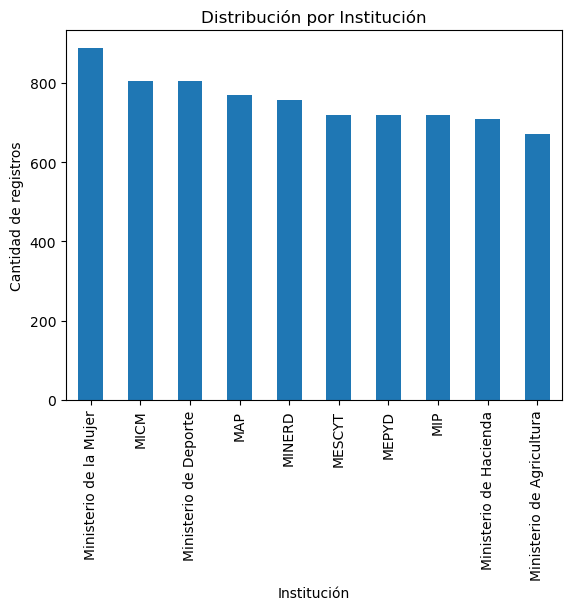

In [1541]:
plt.figure()
df_final["Institucion"].value_counts().plot(kind="bar")
plt.title("Distribución por Institución")
plt.xlabel("Institución")
plt.ylabel("Cantidad de registros")
plt.show()


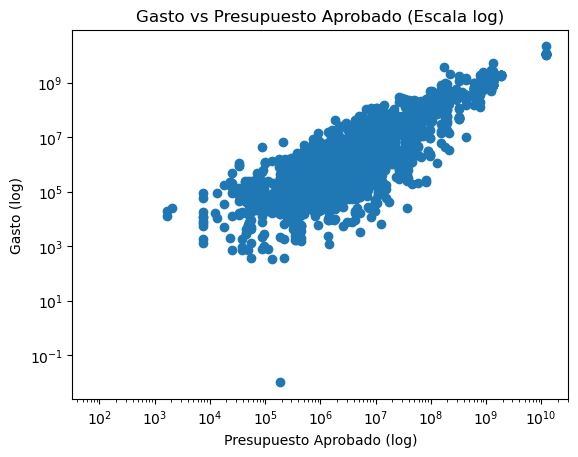

In [1542]:
plt.figure()
plt.scatter(
    df_final["Presupuesto Aprobado"],
    df_final["Gasto"]
)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Presupuesto Aprobado (log)")
plt.ylabel("Gasto (log)")
plt.title("Gasto vs Presupuesto Aprobado (Escala log)")
plt.show()


In [1546]:
df_exec = df_final[
    (df_final["Presupuesto Aprobado"] > 0) &
    (df_final["Porcentaje_Ejecucion"] >= 0) &
    (df_final["Porcentaje_Ejecucion"] <= 200)   


In [1547]:
exec_inst = (
    df_exec
    .groupby("Institucion")["Porcentaje_Ejecucion"]
    .median()
    .sort_values(ascending=False)
)


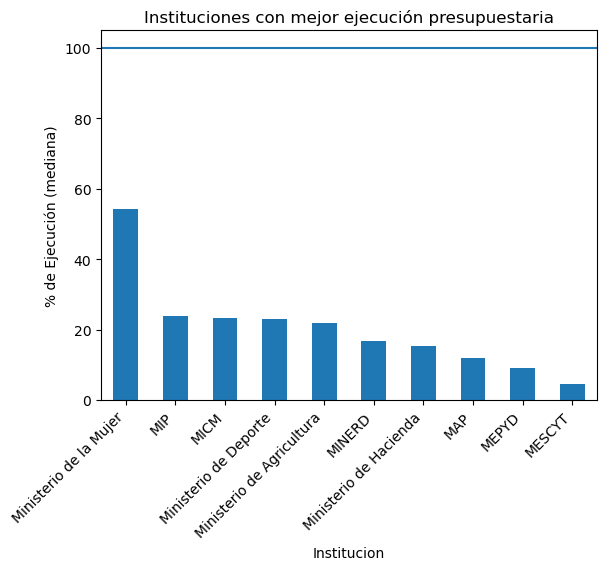

In [1548]:
top_inst = exec_inst.head(10)

plt.figure()
top_inst.plot(kind="bar")
plt.axhline(100)
plt.ylabel("% de Ejecución (mediana)")
plt.title("Instituciones con mejor ejecución presupuestaria")
plt.xticks(rotation=45, ha="right")
plt.show()